<a href="https://www.kaggle.com/code/mohamedabobakr0/telecom-churn-prediction?scriptVersionId=205356245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [69]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

In [70]:
pd.set_option("display.max_columns",6)

data = pd.read_csv('/kaggle/input/telecom-dataset/telco.csv')

data

,customerID,gender,SeniorCitizen,...,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,...,29.85,29.85,No
1,5575-GNVDE,Male,0,...,56.95,1889.5,No
2,3668-QPYBK,Male,0,...,53.85,108.15,Yes
3,7795-CFOCW,Male,0,...,42.30,1840.75,No
4,9237-HQITU,Female,0,...,70.70,151.65,Yes
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,...,84.80,1990.5,No
7039,2234-XADUH,Female,0,...,103.20,7362.9,No
7040,4801-JZAZL,Female,0,...,29.60,346.45,No
7041,8361-LTMKD,Male,1,...,74.40,306.6,Yes


# Exploring the dataset

In [71]:
# Print dataset shape, null values, and description

print(f"Dataset Shape: {data.shape}")

print("\nDataset Information:")

data.info()

print("\nDataset Description:")

print(data.describe())

print("\nMissing Values per Column:")

print(data.isnull().sum())

Dataset Shape: (7043, 21)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 

In [72]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [73]:
# Print dataset shape, null values, and description

print(f"Dataset Shape: {data.shape}")

print("\nDataset Information:")

data.info()

print("\nDataset Description:")

print(data.describe().astype(int))

print("\nMissing Values per Column:")

print(data.isnull().sum())

Dataset Shape: (7043, 21)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 

In [74]:
# Display rows with NaN in 'TotalCharges'

data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,...,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,...,52.55,NaN,No
753,3115-CZMZD,Male,0,...,20.25,NaN,No
936,5709-LVOEQ,Female,0,...,80.85,NaN,No
1082,4367-NUYAO,Male,0,...,25.75,NaN,No
1340,1371-DWPAZ,Female,0,...,56.05,NaN,No
3331,7644-OMVMY,Male,0,...,19.85,NaN,No
3826,3213-VVOLG,Male,0,...,25.35,NaN,No
4380,2520-SGTTA,Female,0,...,20.00,NaN,No
5218,2923-ARZLG,Male,0,...,19.70,NaN,No
6670,4075-WKNIU,Female,0,...,73.35,NaN,No


In [75]:
null_index = data[data['TotalCharges'].isnull()].index

In [76]:
# Replace TotalCharges NaN Values with its Corresponding value in MonthlyCharges 

data['TotalCharges'].fillna(data['MonthlyCharges'],inplace=True)

In [77]:
data.iloc[null_index]

,customerID,gender,SeniorCitizen,...,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,...,52.55,52.55,No
753,3115-CZMZD,Male,0,...,20.25,20.25,No
936,5709-LVOEQ,Female,0,...,80.85,80.85,No
1082,4367-NUYAO,Male,0,...,25.75,25.75,No
1340,1371-DWPAZ,Female,0,...,56.05,56.05,No
3331,7644-OMVMY,Male,0,...,19.85,19.85,No
3826,3213-VVOLG,Male,0,...,25.35,25.35,No
4380,2520-SGTTA,Female,0,...,20.00,20.00,No
5218,2923-ARZLG,Male,0,...,19.70,19.70,No
6670,4075-WKNIU,Female,0,...,73.35,73.35,No


# Outliers

In [78]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [79]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column

Q1 = data[numeric_columns].quantile(0.25)

Q3 = data[numeric_columns].quantile(0.75)

In [80]:
# Calculate the Interquartile Range (IQR)

IQR = Q3 - Q1

In [81]:
# Define the upper and lower bounds for outliers (using a lower threshold for sensitivity)

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

In [82]:
# Detect outliers by checking if values fall outside the bounds

outliers = (data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)

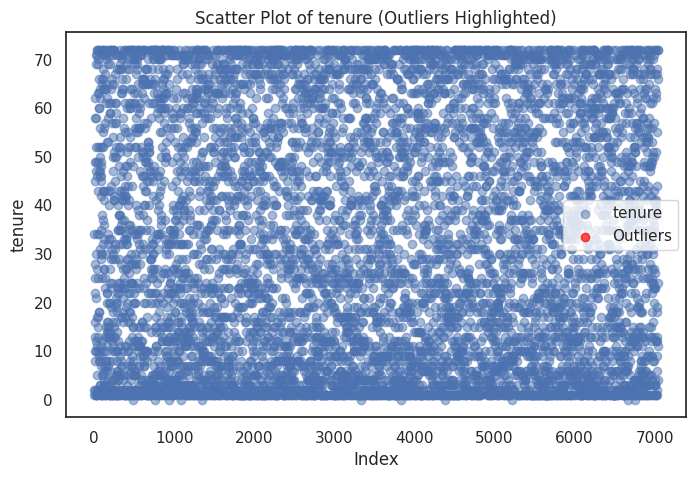

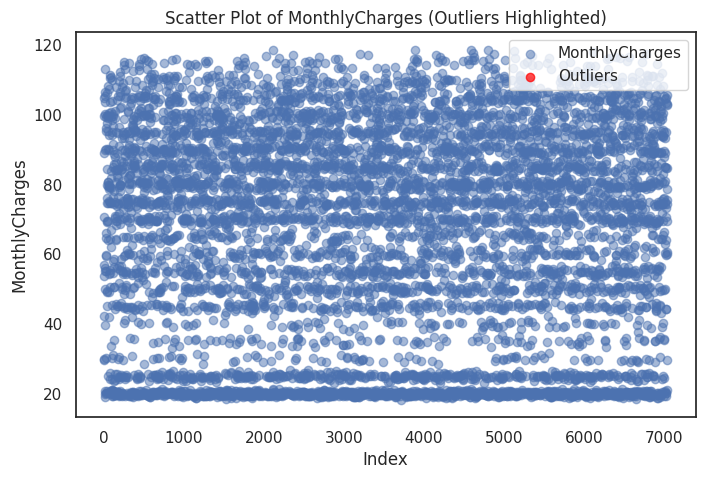

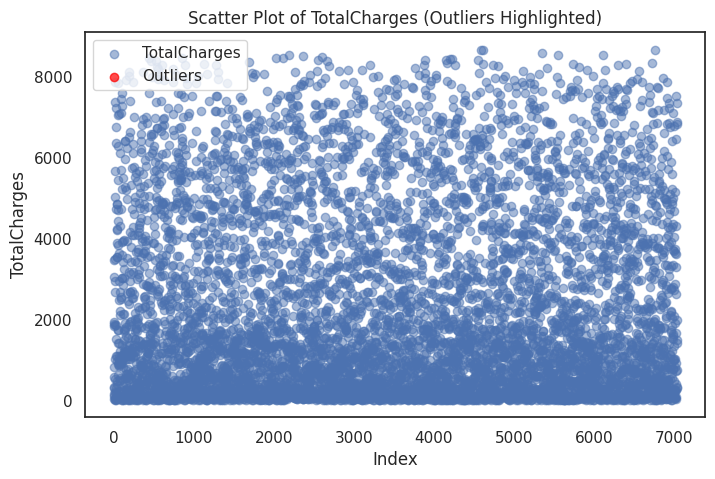

In [83]:
# Define a function to create scatter plots with outliers highlighted

def plot_with_outliers(column_name):

    plt.figure(figsize=(8, 5))

    

    # Plot the data points

    plt.scatter(data.index, data[column_name], label=f'{column_name}', alpha=0.5)

    

    # Highlight the outliers in red

    outlier_idx = outliers[column_name]

    plt.scatter(data[outlier_idx].index, data[outlier_idx][column_name], color='red', label='Outliers', alpha=0.7)

    

    # Add labels and title

    plt.title(f'Scatter Plot of {column_name} (Outliers Highlighted)')

    plt.xlabel('Index')

    plt.ylabel(column_name)

    plt.legend()

    plt.show()



# Create scatter plots for each numeric column

for col in numeric_columns:

    plot_with_outliers(col)

# EDA 

In [84]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Select Categorical Variables

In [85]:
print(data.nunique())



# Exclude columns has more than 4 unique value

columns = data.nunique()[data.nunique() < 5]

print(columns)



categorical_columns = data[columns.index.values]

categorical_columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


,gender,SeniorCitizen,Partner,...,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,...,Yes,Electronic check,No
1,Male,0,No,...,No,Mailed check,No
2,Male,0,No,...,Yes,Mailed check,Yes
3,Male,0,No,...,No,Bank transfer (automatic),No
4,Female,0,No,...,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...
7038,Male,0,Yes,...,Yes,Mailed check,No
7039,Female,0,Yes,...,Yes,Credit card (automatic),No
7040,Female,0,Yes,...,Yes,Electronic check,No
7041,Male,1,Yes,...,Yes,Mailed check,Yes


### Visualize Categorical Variables:

In [86]:
categorical_columns

,gender,SeniorCitizen,Partner,...,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,...,Yes,Electronic check,No
1,Male,0,No,...,No,Mailed check,No
2,Male,0,No,...,Yes,Mailed check,Yes
3,Male,0,No,...,No,Bank transfer (automatic),No
4,Female,0,No,...,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...
7038,Male,0,Yes,...,Yes,Mailed check,No
7039,Female,0,Yes,...,Yes,Credit card (automatic),No
7040,Female,0,Yes,...,Yes,Electronic check,No
7041,Male,1,Yes,...,Yes,Mailed check,Yes


In [87]:
# split category into 3 dataframs for easy visulaization with Churn

# frist features_category with columns [gender,	SeniorCitizen, Partner, Dependents]



# second service_category with columns [PhoneService, MultipleLines, InternetService, 

#                                       OnlineSecurity, OnlineBackup, DeviceProtection, 

#                                       TechSupport, StreamingTV, StreamingMovies]



# third payment_category with columns [Contract, PaperlessBilling, PaymentMethod]

In [88]:
features_category = categorical_columns.iloc[:,:4].columns.tolist()



service_category = categorical_columns.iloc[:,4:13].columns.tolist()



payment_category = categorical_columns.iloc[:,13:16].columns.tolist()



# count every category for Churn

total_counts_per_category = data.groupby("Churn").size().reset_index(name='Total')

total_counts_per_category

,Churn,Total
0,No,5174
1,Yes,1869


In [89]:
def churn_proportion_plot_cat(rows,cols,cat_data):

    # Set the style of the plot

    sns.set(style="whitegrid")

    

    

    # Create a new figure for the plots

    plt.figure(figsize=(18, rows * 5))

    

    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    

    diff_in_prop = []

    key = 0

    # plot each columns with Churn

    for i,column in enumerate(cat_data):

        

        plt.subplot(rows,cols, i + 1) 

        

        # Create a dataframe with Proportion of every category of every feature with recpect to differnt type of Churn

        category_counts = data.groupby(['Churn',column]).size().reset_index(name='Counts')

        proportions = pd.merge(category_counts, total_counts_per_category, on="Churn")

        proportions['Proportion'] = proportions['Counts'] / proportions['Total']



    



        # plot proportions data

        ax = sns.barplot(data=proportions,x="Churn",y="Proportion",errorbar=None,hue=column,width=0.9,alpha=0.6, palette='Set1')

        

        # add proportions number as a text at each bar

        for container in ax.containers:

            ax.bar_label(container, fmt="%.0f%%", labels=[f'{h * 100 :.0f}%' for h in container.datavalues], label_type="edge", padding=3)





        # calculate differnece in Proportion between Churn No and Churn Yes for later visulaization 

        size = len(ax.containers)

        labels = ax.get_legend_handles_labels()[1]

       

        for i in range(size):

            values = ax.containers[i].datavalues

            diff = values[1] - values[0]

            name = str(column) + " "+ str(labels[i])

            diff_in_prop.append((name,diff))

            

        plt.ylim(0,1)

        ax.margins(y=0.3) 

        plt.ylabel("")

        plt.xlabel("")

        plt.title(f'Churn by {column}', fontsize=16)

        

    plt.show()

    return diff_in_prop

In [90]:
def diff_in_prop_plot(diff_in_prop):

    

    a,b = zip(*diff_in_prop)

    p_to_d = pd.DataFrame({"var":a,"value":b}).sort_values("value")

    

    plt.figure(figsize=(12,6))

    ax = sns.barplot(data=p_to_d,x="var",y="value",hue="value")

    for container in ax.containers:

            ax.bar_label(container, fmt="%.0f%%", labels=[f'{h * 100 :.0f}%' for h in container.datavalues], label_type="edge", padding=3)



    plt.xticks(rotation=45, ha='right')

    ax.margins(y=0.2) 

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



    plt.ylabel("")

    plt.xlabel("")

    plt.show()

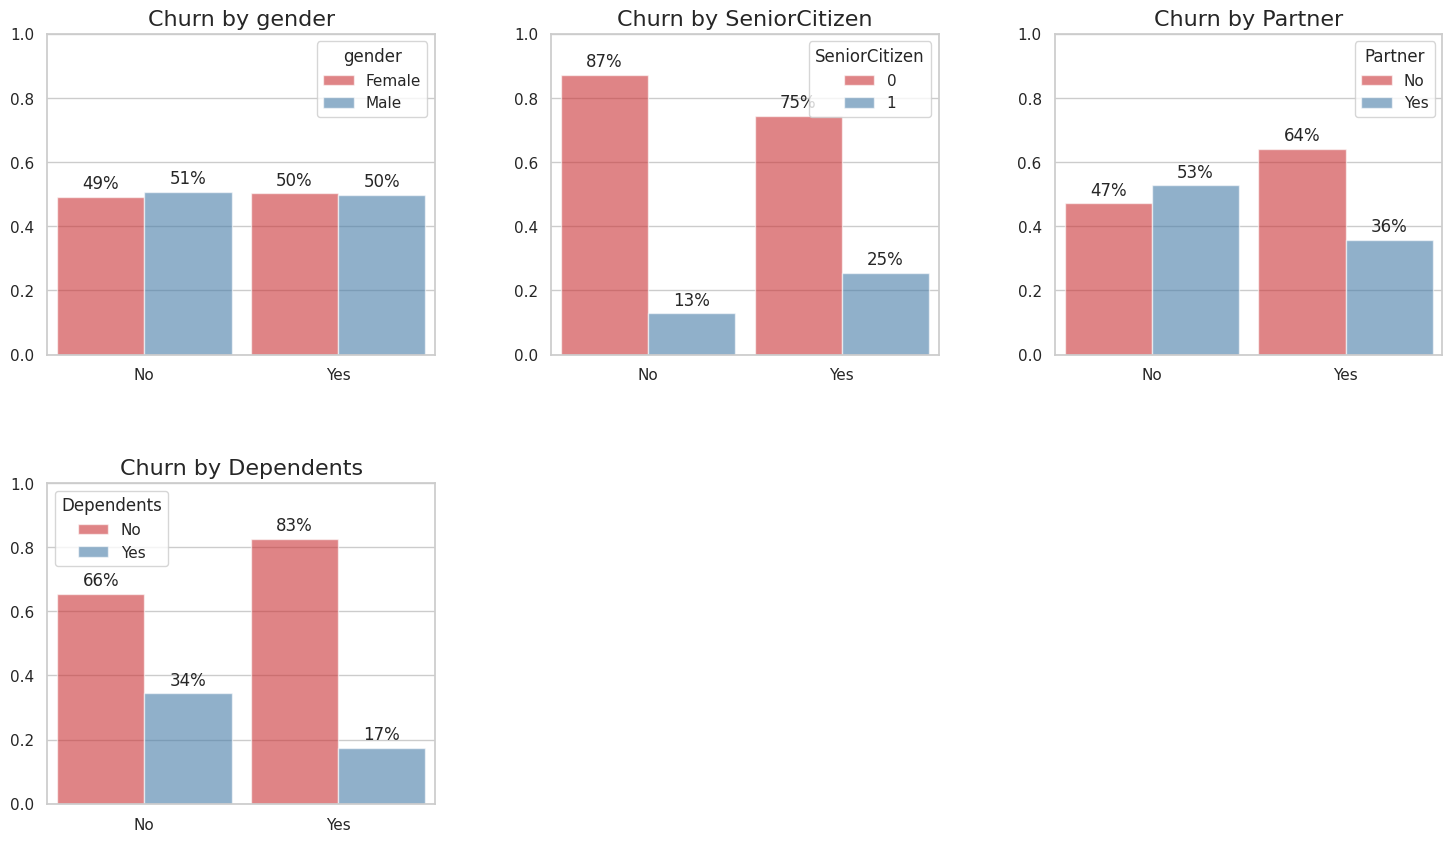

In [91]:
diff_in_prop = churn_proportion_plot_cat(2 , 3, features_category)

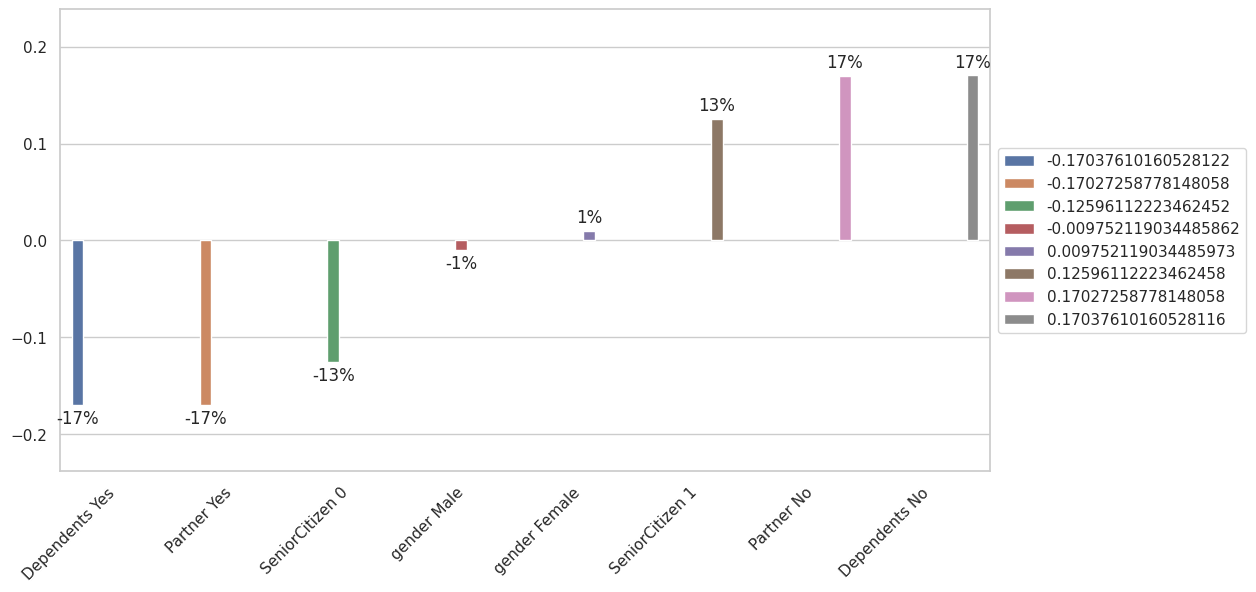

In [92]:
diff_in_prop_plot(diff_in_prop)

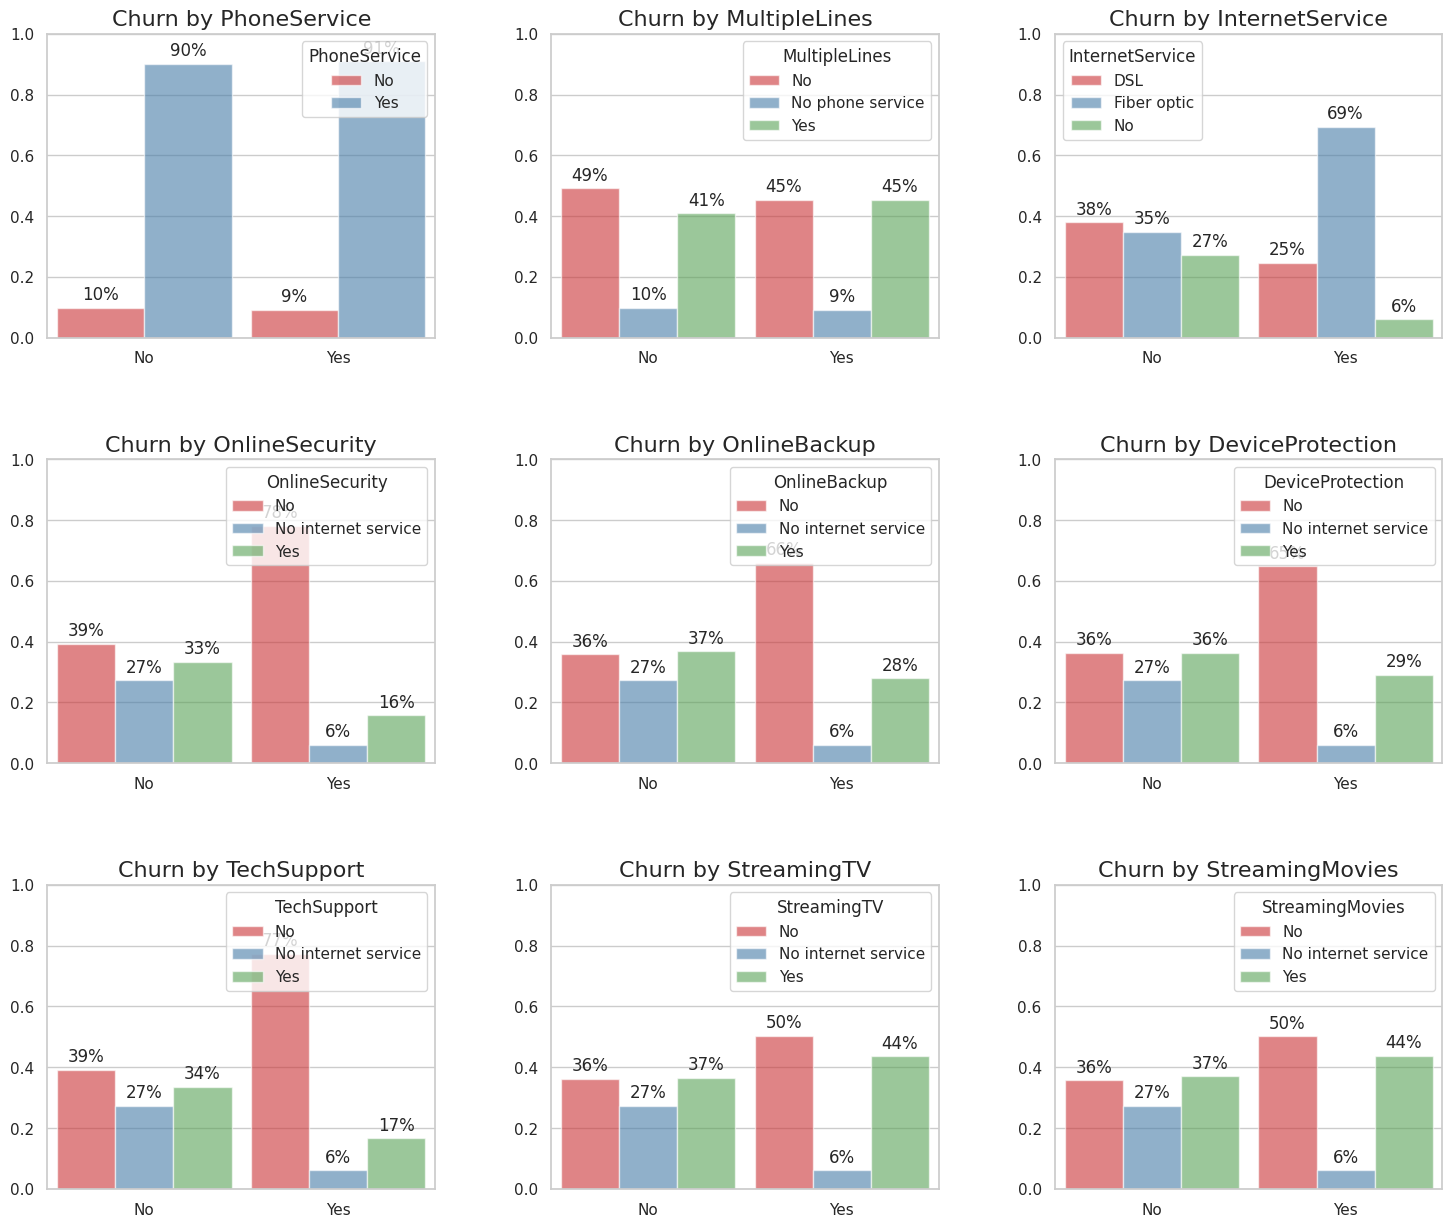

In [93]:
diff_in_prop = churn_proportion_plot_cat(3 , 3, service_category)

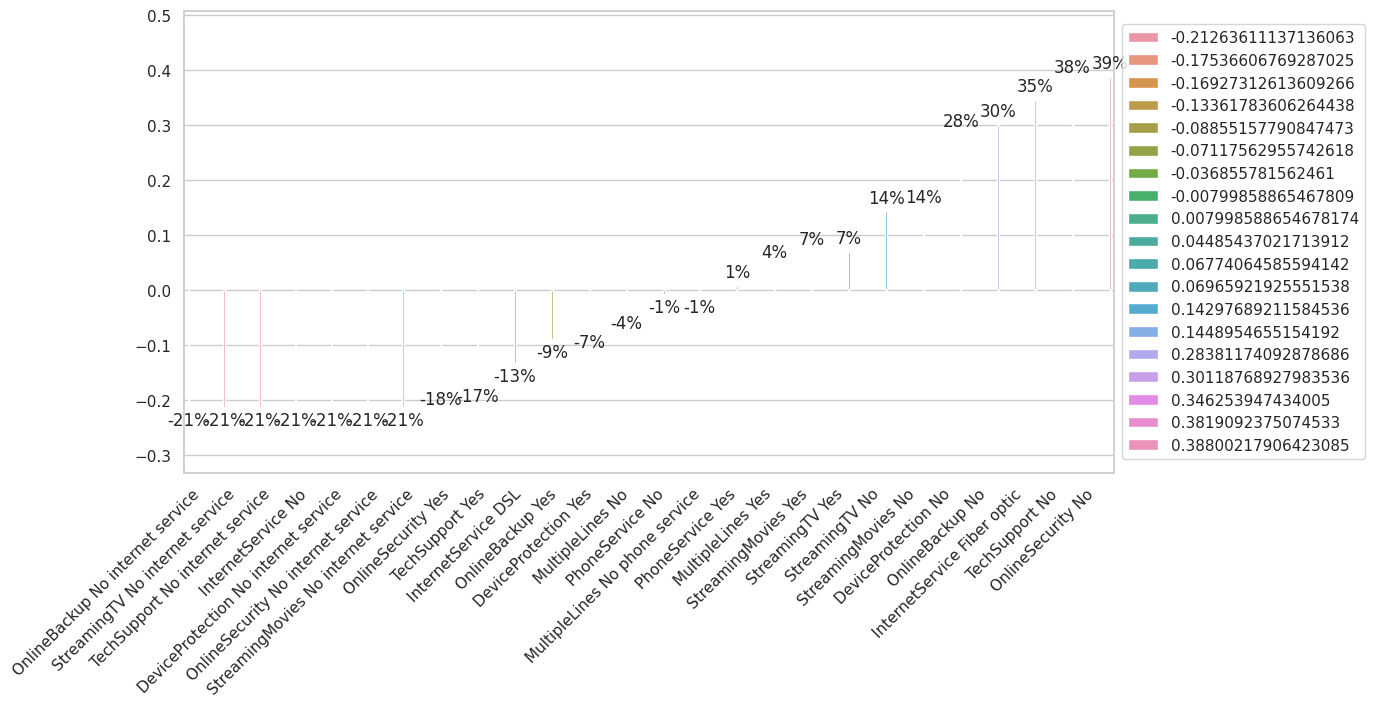

In [94]:
diff_in_prop_plot(diff_in_prop)

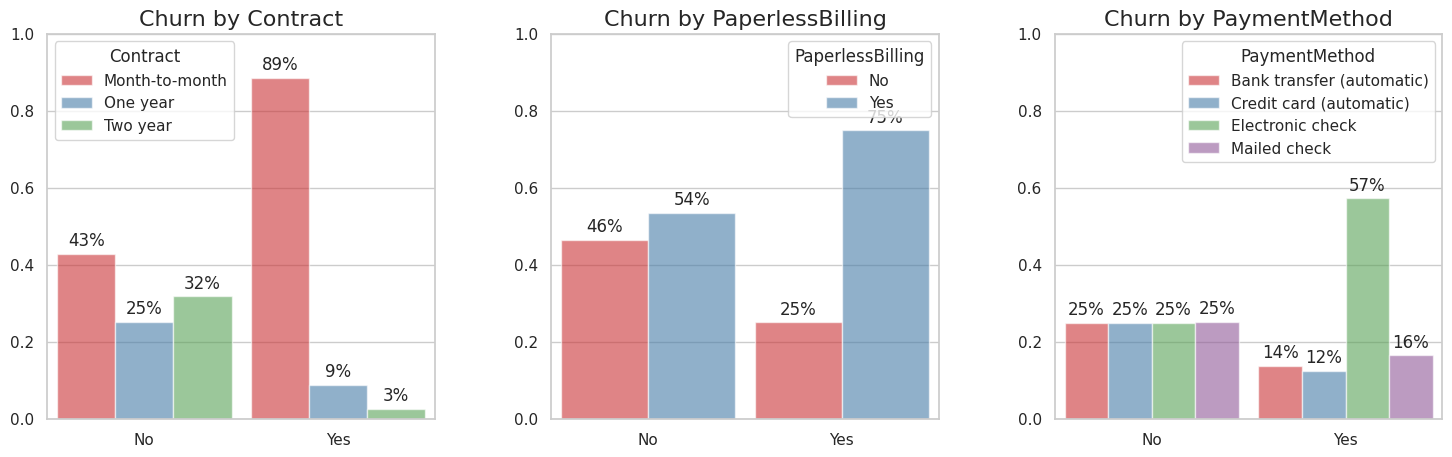

In [95]:
diff_in_prop = churn_proportion_plot_cat(1 , 3, payment_category)

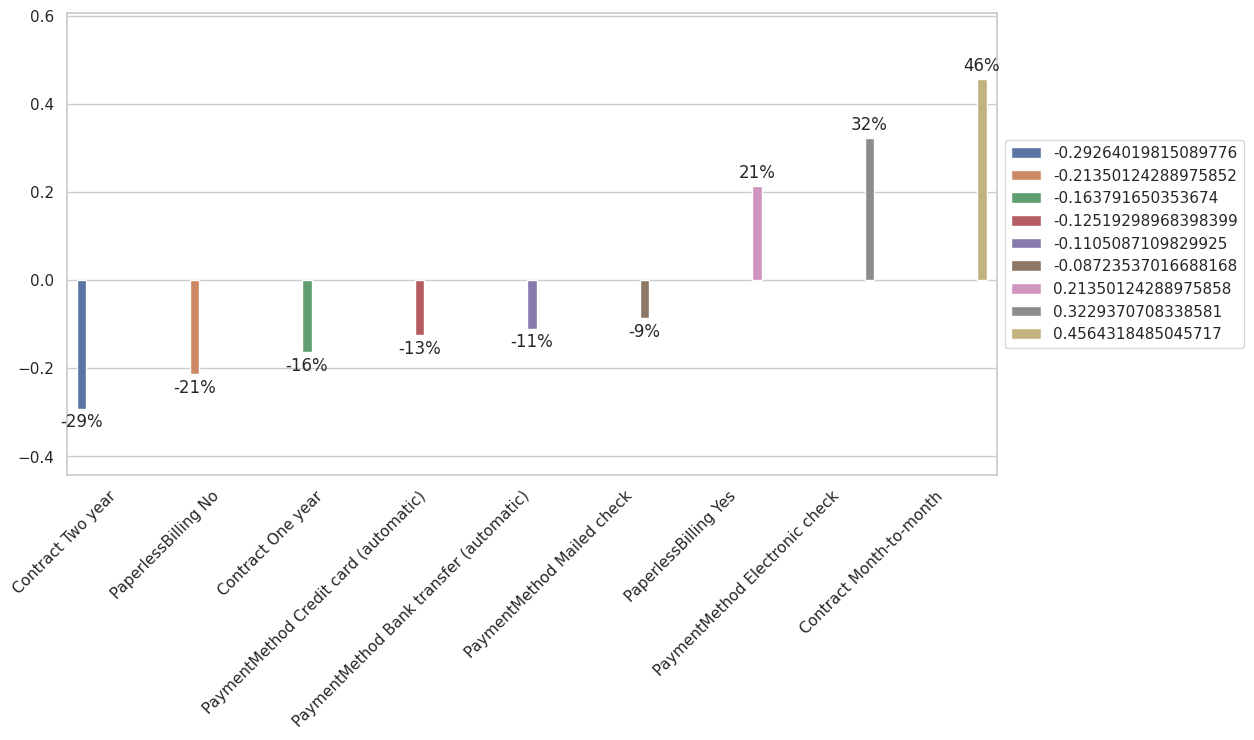

In [96]:
diff_in_prop_plot(diff_in_prop)

In [97]:
count_service = data[np.insert(service_category, 0, 'customerID')]



count_service = pd.get_dummies(count_service,columns=['InternetService']).drop("InternetService_No",axis=1)



count_service.iloc[:,1:] = count_service.iloc[:,1:].map(lambda x: 1 if (x == "Yes") | (x == True) else 0)

count_service

,customerID,PhoneService,MultipleLines,...,StreamingMovies,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,0,0,...,0,1,0
1,5575-GNVDE,1,0,...,0,1,0
2,3668-QPYBK,1,0,...,0,1,0
3,7795-CFOCW,0,0,...,0,1,0
4,9237-HQITU,1,0,...,0,0,1
...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,...,1,1,0
7039,2234-XADUH,1,1,...,1,0,1
7040,4801-JZAZL,0,0,...,0,1,0
7041,8361-LTMKD,1,1,...,0,0,1


In [98]:
for column in count_service.columns.values[1:]:

    count_service[column] = count_service[column].astype(int)



count_service.dtypes

customerID                     object
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
InternetService_DSL             int64
InternetService_Fiber optic     int64
dtype: object

<Axes: xlabel='Number of services', ylabel='count'>

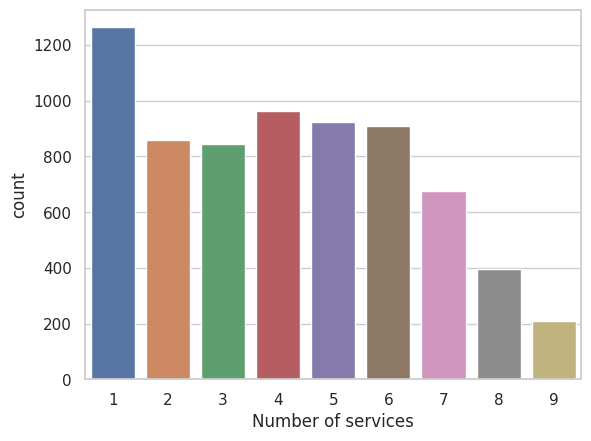

In [99]:
service_num_each_cst = count_service.sum(axis=1,numeric_only=True)



service_num_each_cst = count_service['customerID'].to_frame().join(service_num_each_cst.to_frame("Number of services"))



sns.countplot(service_num_each_cst,x="Number of services")

<Axes: xlabel='Number of services', ylabel='count'>

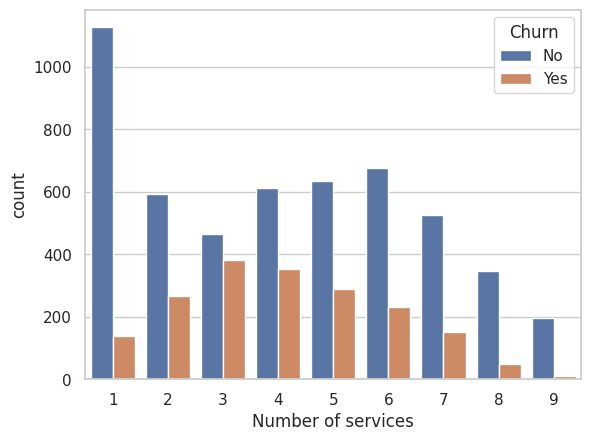

In [100]:
service_num_each_cst = service_num_each_cst.merge(data[["customerID","Churn"]],on="customerID")

sns.countplot(service_num_each_cst,x="Number of services",hue="Churn")

In [101]:
count_service

,customerID,PhoneService,MultipleLines,...,StreamingMovies,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,0,0,...,0,1,0
1,5575-GNVDE,1,0,...,0,1,0
2,3668-QPYBK,1,0,...,0,1,0
3,7795-CFOCW,0,0,...,0,1,0
4,9237-HQITU,1,0,...,0,0,1
...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,...,1,1,0
7039,2234-XADUH,1,1,...,1,0,1
7040,4801-JZAZL,0,0,...,0,1,0
7041,8361-LTMKD,1,1,...,0,0,1


In [102]:
count_service_by_cst = count_service.melt(id_vars=["customerID"])

count_service_by_cst

,customerID,variable,value
0,7590-VHVEG,PhoneService,0
1,5575-GNVDE,PhoneService,1
2,3668-QPYBK,PhoneService,1
3,7795-CFOCW,PhoneService,0
4,9237-HQITU,PhoneService,1
...,...,...,...
70425,6840-RESVB,InternetService_Fiber optic,0
70426,2234-XADUH,InternetService_Fiber optic,1
70427,4801-JZAZL,InternetService_Fiber optic,0
70428,8361-LTMKD,InternetService_Fiber optic,1


In [103]:
count_service_by_cst = count_service_by_cst[count_service_by_cst['value'] == 1].drop("value",axis=1)

count_service_by_cst

,customerID,variable
1,5575-GNVDE,PhoneService
2,3668-QPYBK,PhoneService
4,9237-HQITU,PhoneService
5,9305-CDSKC,PhoneService
6,1452-KIOVK,PhoneService
...,...,...
70421,0639-TSIQW,InternetService_Fiber optic
70422,8456-QDAVC,InternetService_Fiber optic
70426,2234-XADUH,InternetService_Fiber optic
70428,8361-LTMKD,InternetService_Fiber optic


In [104]:
count_service_by_cst.sort_values("customerID").head(10)

,customerID,variable
2307,0002-ORFBO,PhoneService
58651,0002-ORFBO,InternetService_DSL
44565,0002-ORFBO,StreamingTV
37522,0002-ORFBO,TechSupport
23436,0002-ORFBO,OnlineBackup
10531,0003-MKNFE,MultipleLines
59832,0003-MKNFE,InternetService_DSL
52789,0003-MKNFE,StreamingMovies
3488,0003-MKNFE,PhoneService
3845,0004-TLHLJ,PhoneService


<Axes: xlabel='count', ylabel='variable'>

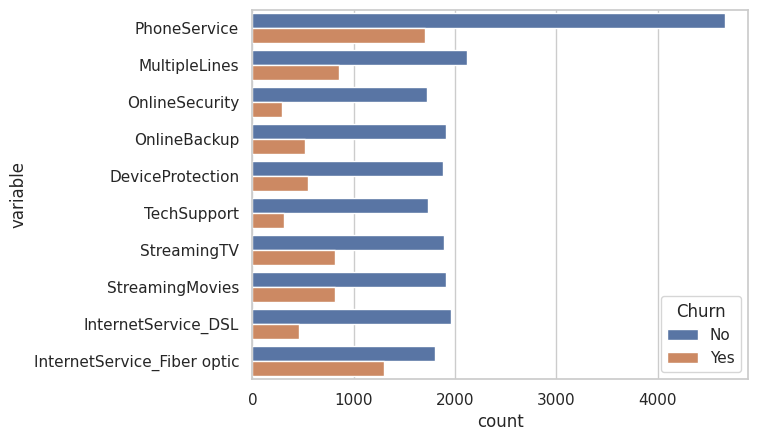

In [105]:
plot_service_count = count_service_by_cst.merge(data[["customerID","Churn"]],on="customerID")



sns.countplot(data=plot_service_count,y='variable',hue='Churn')

In [106]:
plot_service_count['variable'].value_counts() / plot_service_count['customerID'].nunique() * 100

variable
PhoneService                   90.316626
InternetService_Fiber optic    43.958540
MultipleLines                  42.183729
StreamingMovies                38.790288
StreamingTV                    38.435326
OnlineBackup                   34.488144
DeviceProtection               34.388755
InternetService_DSL            34.374556
TechSupport                    29.021724
OnlineSecurity                 28.666761
Name: count, dtype: float64

In [107]:
import itertools



def create_compinations(groups,k):

    # create number of columns based on number of service

    columns = []

    for i in range(1,k+1):

        columns.append("Service_" + str(i))

    

    final_data_frame = pd.DataFrame()

    for i in groups.groups.__iter__():

        group_df = groups.get_group(i)

        services = group_df['variable'].sort_values()

        comp_list = list(itertools.combinations(services, k))

        comp_df = pd.DataFrame(comp_list,columns=columns)

        comp_df["customerID"] = group_df["customerID"].iloc[0]

        comp_df["Churn"] = group_df["Churn"].iloc[0]

        

        final_data_frame = pd.concat([final_data_frame,comp_df])

    return final_data_frame

In [108]:
groups = plot_service_count.groupby(['customerID','Churn'])

results = create_compinations(groups,2)

results

,Service_1,Service_2,customerID,Churn
0,InternetService_DSL,OnlineBackup,0002-ORFBO,No
1,InternetService_DSL,PhoneService,0002-ORFBO,No
2,InternetService_DSL,StreamingTV,0002-ORFBO,No
3,InternetService_DSL,TechSupport,0002-ORFBO,No
4,OnlineBackup,PhoneService,0002-ORFBO,No
...,...,...,...,...
10,OnlineBackup,StreamingMovies,9995-HOTOH,No
11,OnlineBackup,StreamingTV,9995-HOTOH,No
12,OnlineSecurity,StreamingMovies,9995-HOTOH,No
13,OnlineSecurity,StreamingTV,9995-HOTOH,No


In [109]:
results[['Service_1', 'Service_2']].value_counts()

Service_1                    Service_2                  
InternetService_Fiber optic  PhoneService                   3096
MultipleLines                PhoneService                   2971
PhoneService                 StreamingMovies                2434
                             StreamingTV                    2422
OnlineBackup                 PhoneService                   2142
DeviceProtection             PhoneService                   2117
StreamingMovies              StreamingTV                    1940
InternetService_Fiber optic  MultipleLines                  1938
PhoneService                 TechSupport                    1755
InternetService_Fiber optic  StreamingMovies                1751
                             StreamingTV                    1750
InternetService_DSL          PhoneService                   1739
OnlineSecurity               PhoneService                   1736
DeviceProtection             StreamingMovies                1595
MultipleLines                Stre

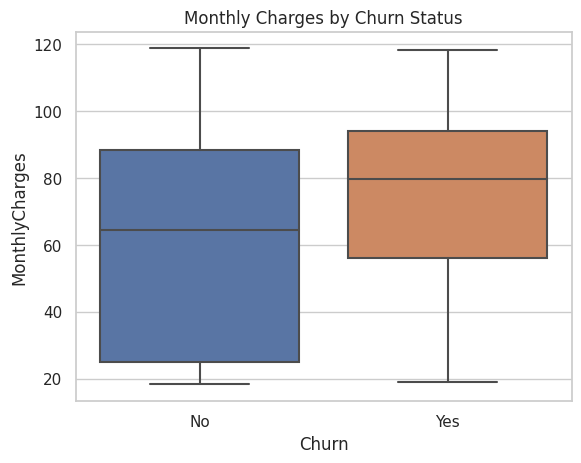

In [110]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges')

plt.title('Monthly Charges by Churn Status')

plt.show()

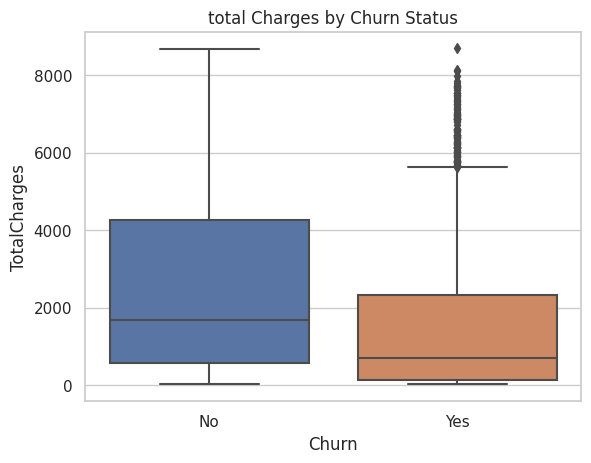

In [111]:
sns.boxplot(data=data, x='Churn', y='TotalCharges')

plt.title('total Charges by Churn Status')

plt.show()

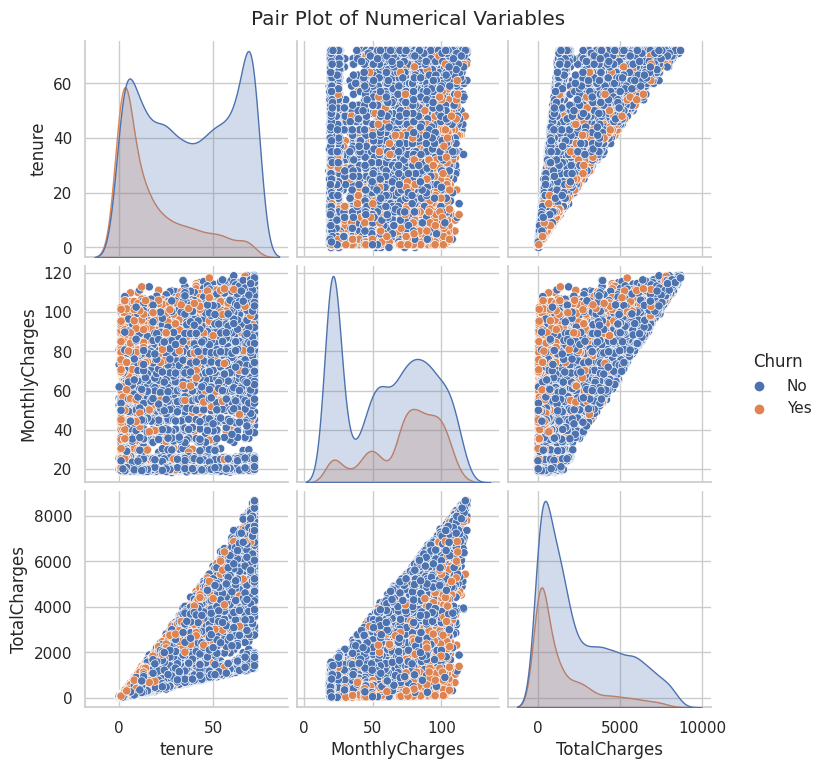

In [112]:
# Create a pair plot for numerical columns

sns.pairplot(data[numeric_columns+["Churn"]], diag_kind='kde', hue='Churn')  # Specify 'Churn' if you want to color by this column

plt.suptitle('Pair Plot of Numerical Variables', y=1.02)

plt.show()


-The distribution of SeniorCitizen (binary variable) shows a notable difference between those who churned and those who did not, but the relationship may not be very strong.



-A clear inverse relationship can be seen; customers with longer tenure (higher values) are less likely to churn.

The density of churned customers is higher in the lower tenure range, indicating that newer customers are more prone to churning.





-There is a mixed distribution; churned customers appear across all ranges of monthly charges.

However, higher monthly charges seem to correlate slightly with lower churn rates, especially at lower tenure values.





-Similar to MonthlyCharges, the relationship is less clear.

Higher total charges are more common among non-churned customers, likely due to longer tenure.





-Tenure appears to have a significant impact on churn, as seen by the tighter grouping of non-churned customers in the upper tenure range.

Both MonthlyCharges and TotalCharges may be influenced by tenure, as customers with a longer tenure tend to have higher total charges.





-Newer customers (lower tenure) show a higher probability of churning, regardless of their monthly charges or total charges.


In [113]:
import warnings

warnings.filterwarnings('ignore')

# Data Preprocessing

In [114]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, KFold

In [115]:
count_service_cols = numeric_columns + ["customerID","Churn"]

features_category_cols = features_category + ["customerID"]

numeric_columns_cols = numeric_columns + ['customerID']

data

full_data = count_service.merge(data[count_service_cols],on="customerID")



mapped_data = data[features_category_cols]



for i in features_category:

    if i == 'SeniorCitizen':

        continue

    mapped_data.loc[:,i] = mapped_data.loc[:,i].map({"Yes": 1 , "No":0,"Male":1,"Female":0})





full_data = full_data.merge(mapped_data,on="customerID")



full_data = full_data.drop('customerID',axis=1)



full_data["Churn"] = full_data["Churn"].map({"Yes": 1 , "No":0})



full_data

,PhoneService,MultipleLines,OnlineSecurity,...,SeniorCitizen,Partner,Dependents
0,0,0,0,...,0,1,0
1,1,0,1,...,0,0,0
2,1,0,1,...,0,0,0
3,0,0,1,...,0,0,0
4,1,0,0,...,0,0,0
...,...,...,...,...,...,...,...
7038,1,1,1,...,0,1,1
7039,1,1,0,...,0,1,1
7040,0,0,1,...,0,1,1
7041,1,1,0,...,1,1,0


In [116]:
X_full_data = full_data.drop("Churn", axis=1).values

y_full_data = full_data["Churn"].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_full_data, y_full_data, test_size=0.20, random_state=42, stratify=y_full_data)

### Feature Selection Using Lasso Regression

In [118]:
# parameters to be tested on GridSearchCV

params = {"alpha":np.arange(0.00001, 10, 500)}



# Number of Folds and adding the random state for replication

kf=KFold(n_splits=5,shuffle=True, random_state=101)



# Initializing the Model

lasso = Lasso()



# GridSearchCV with model, params and folds.

lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)

lasso_cv.fit(X_train, y_train)

print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'OnlineSecurity'),
  Text(1, 0, 'TechSupport'),
  Text(2, 0, 'Dependents'),
  Text(3, 0, 'MonthlyCharges'),
  Text(4, 0, 'tenure'),
  Text(5, 0, 'TotalCharges'),
  Text(6, 0, 'gender'),
  Text(7, 0, 'OnlineBackup'),
  Text(8, 0, 'Partner'),
  Text(9, 0, 'DeviceProtection'),
  Text(10, 0, 'SeniorCitizen'),
  Text(11, 0, 'PhoneService'),
  Text(12, 0, 'MultipleLines'),
  Text(13, 0, 'StreamingMovies'),
  Text(14, 0, 'StreamingTV'),
  Text(15, 0, 'InternetService_DSL'),
  Text(16, 0, 'InternetService_Fiber optic')])

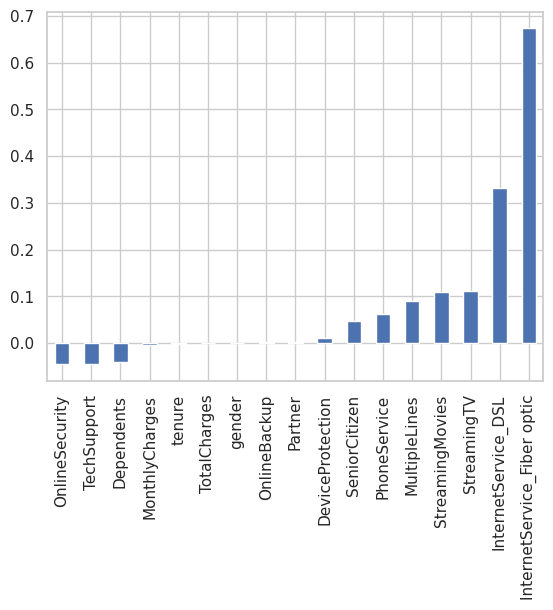

In [119]:
names = full_data.drop("Churn", axis=1).columns

coefs = lasso_cv.best_estimator_.coef_

plot_data = pd.Series(coefs,index=names).sort_values()

plot_data.plot(kind='bar')

plt.xticks(rotation=90)

## Modeling

In [120]:
# Metrics

from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier



dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_hat = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.47      0.48      0.48       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



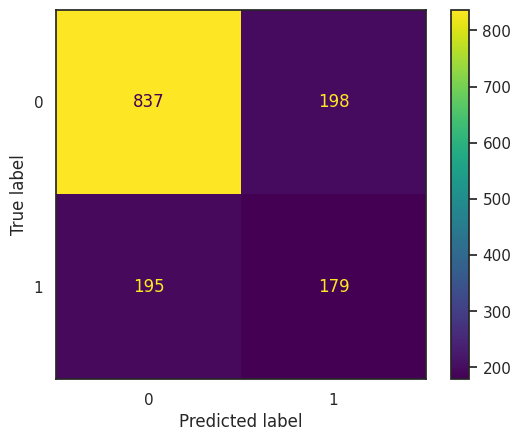

In [122]:
sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_hat)).plot()

print(classification_report(y_test,y_hat))

### BaggingClassifier

In [123]:
from sklearn.ensemble import BaggingClassifier



dt = DecisionTreeClassifier()

bc = BaggingClassifier(estimator=dt,n_estimators=100)



bc.fit(X_train,y_train)

y_hat = bc.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.59      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



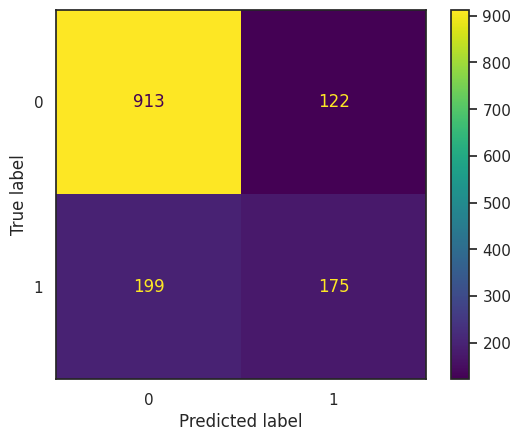

In [124]:
sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_hat)).plot()

print(classification_report(y_test,y_hat))

### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

y_hat = bc.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.59      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



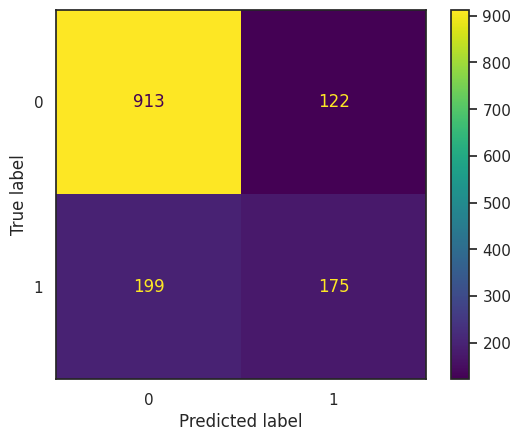

In [126]:
sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_hat)).plot()

print(classification_report(y_test,y_hat))

### AdaBoostClassifier

In [127]:
from sklearn.ensemble import AdaBoostClassifier



dt = DecisionTreeClassifier(max_depth=1)

adc = AdaBoostClassifier(estimator=dt,n_estimators=100)



adc.fit(X_train,y_train)

y_hat = adc.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



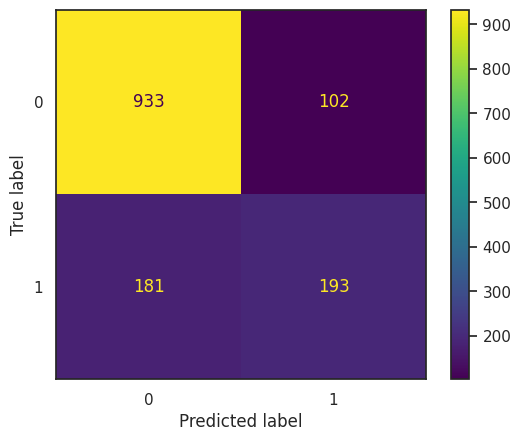

In [128]:
sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_hat)).plot()

print(classification_report(y_test,y_hat))

### VotingClassifier

In [129]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC



logreg = LogisticRegression()

svc = SVC()

tree = DecisionTreeClassifier()



classifiers = [

    ('logreg',logreg),

    ('svc',svc),

    ('tree',tree)

]



vc = VotingClassifier(classifiers)

vc.fit(X_train,y_train)

y_hat = vc.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1035
           1       0.68      0.34      0.45       374

    accuracy                           0.78      1409
   macro avg       0.74      0.64      0.66      1409
weighted avg       0.77      0.78      0.75      1409



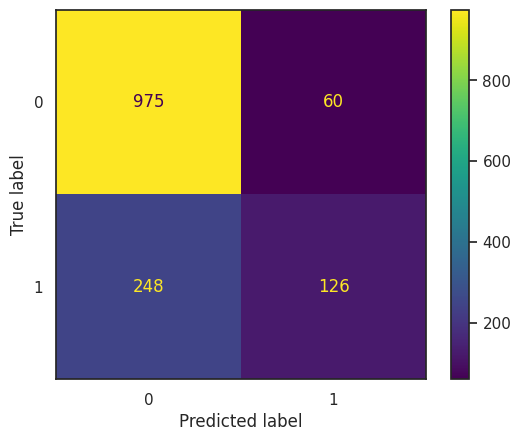

In [130]:
sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_hat)).plot()

print(classification_report(y_test,y_hat))

### Random Forest With balanced Data

In [131]:
from imblearn.over_sampling import RandomOverSampler

X_full_balanced ,y_full_data_balanced = RandomOverSampler().fit_resample(X_full_data,y_full_data)



X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_full_balanced, y_full_data_balanced, test_size=0.20, random_state=42, stratify=y_full_data_balanced)


In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_balanced,y_train_balanced)

y_hat = bc.predict(X_test_balanced)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.88      0.85      0.86      1035

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



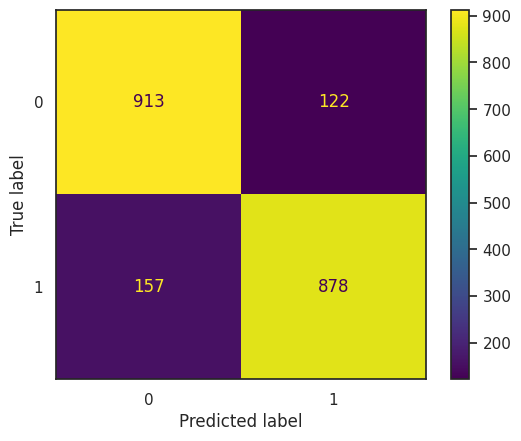

In [133]:
sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_test_balanced,y_hat)).plot()

print(classification_report(y_test_balanced,y_hat))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1035
           1       0.51      0.42      0.46       374

    accuracy                           0.74      1409
   macro avg       0.66      0.64      0.65      1409
weighted avg       0.73      0.74      0.73      1409



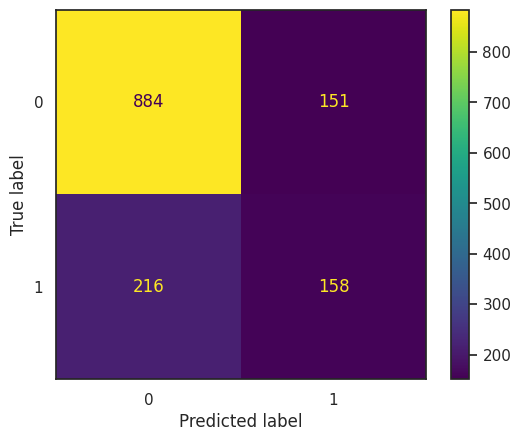

In [134]:
X = data[["tenure","MonthlyCharges","TotalCharges"]]

y = full_data["Churn"]

from imblearn.over_sampling import RandomOverSampler

X_full_balanced ,y_full_data_balanced = RandomOverSampler().fit_resample(X_full_data,y_full_data)



X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)





from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_tr,y_tr)

y_hat = rf.predict(X_te)





sns.set_style("white")

ConfusionMatrixDisplay(confusion_matrix(y_te,y_hat)).plot()

print(classification_report(y_te,y_hat))